### Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Load Train / Test Dataset 

In [2]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [4]:
# Size of Train data 

train.shape

(614, 13)

In [5]:
# Size of Test data 

test.shape

(367, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preprocessing 

In [8]:
data = pd.concat([train,test])

In [9]:
data.drop('Loan_ID', inplace=True, axis='columns')

In [10]:
# Identify missing values

data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [11]:
# Imputing the missing values

data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [15]:
# filling missing values of LoanAmount and Loan_Amount_Term

data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]

from sklearn.ensemble import RandomForestRegressor

imp = IterativeImputer(RandomForestRegressor(), max_iter=1000, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

data['LoanAmount'] = data1['LoanAmount']
data['Loan_Amount_Term'] = data1['Loan_Amount_Term']

In [13]:
data['Gender'] = data['Gender'].map({'Male':0,'Female':1}).astype(int)
data['Married'] = data['Married'].map({'No':0,'Yes':1}).astype(int)
data['Education'] = data['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
data['Credit_History'] = data['Credit_History'].astype(int) 

In [14]:
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [16]:
# creating a new feature

data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

### Exploratory Data Analysis (EDA)

In [17]:
# Splitting the data to new_train and new_test so that we can perform EDA.

new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [18]:
# Mapping ‘N’ to 0 and ‘Y’ to 1

new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

In [29]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = new_train, ax=ax[0][0])
sns.countplot(x='Gender', data = new_train, ax=ax[0][1])
sns.countplot(x='Married', data = new_train, ax=ax[0][2])
sns.countplot(x='Education', data = new_train, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = new_train, ax=ax[1][0])
sns.countplot(x='Property_Area', data = new_train, ax=ax[1][1])
sns.countplot(x='Credit_History', data = new_train, ax=ax[1][2])
sns.countplot(x='Dependents', data = new_train, ax=ax[1][3])

<Axes: xlabel='Dependents', ylabel='count'>

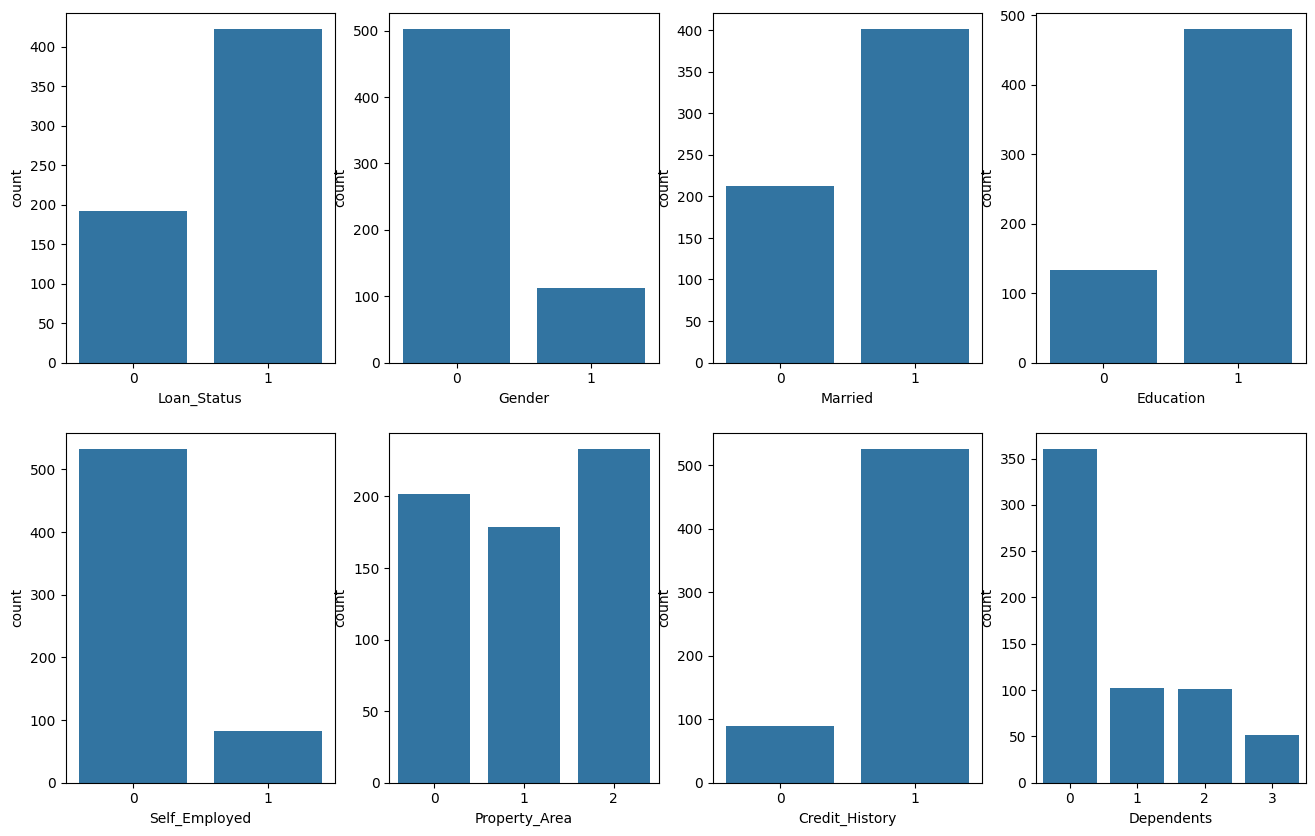

In [30]:
plt.show()

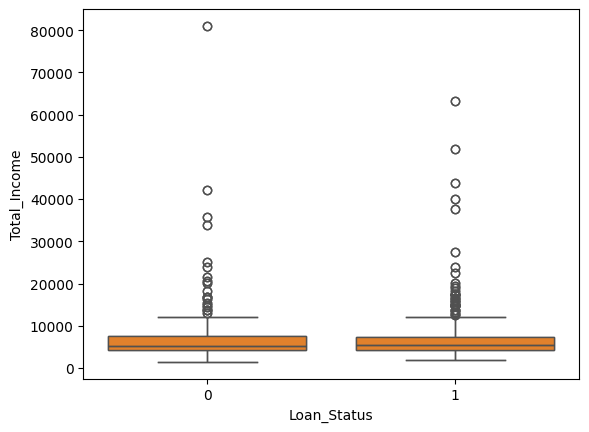

In [32]:
sns.boxplot(x='Loan_Status', y='Total_Income', data=new_train)
plt.show()

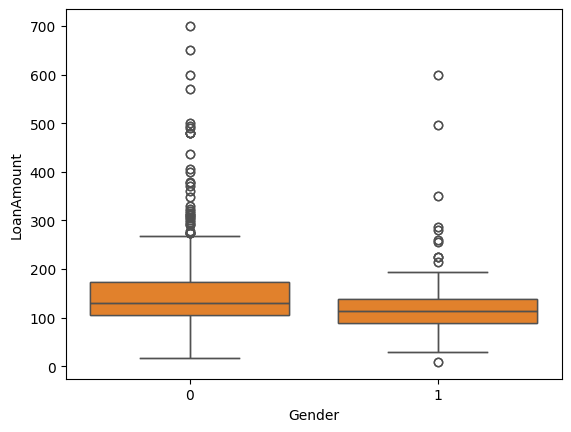

In [35]:
sns.boxplot(x='Gender', y='LoanAmount', data=new_train)
plt.show()

In [36]:
# Correlation matrix

plt.figure(figsize = (10,10))
correlation_matrix = new_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

<Axes: >

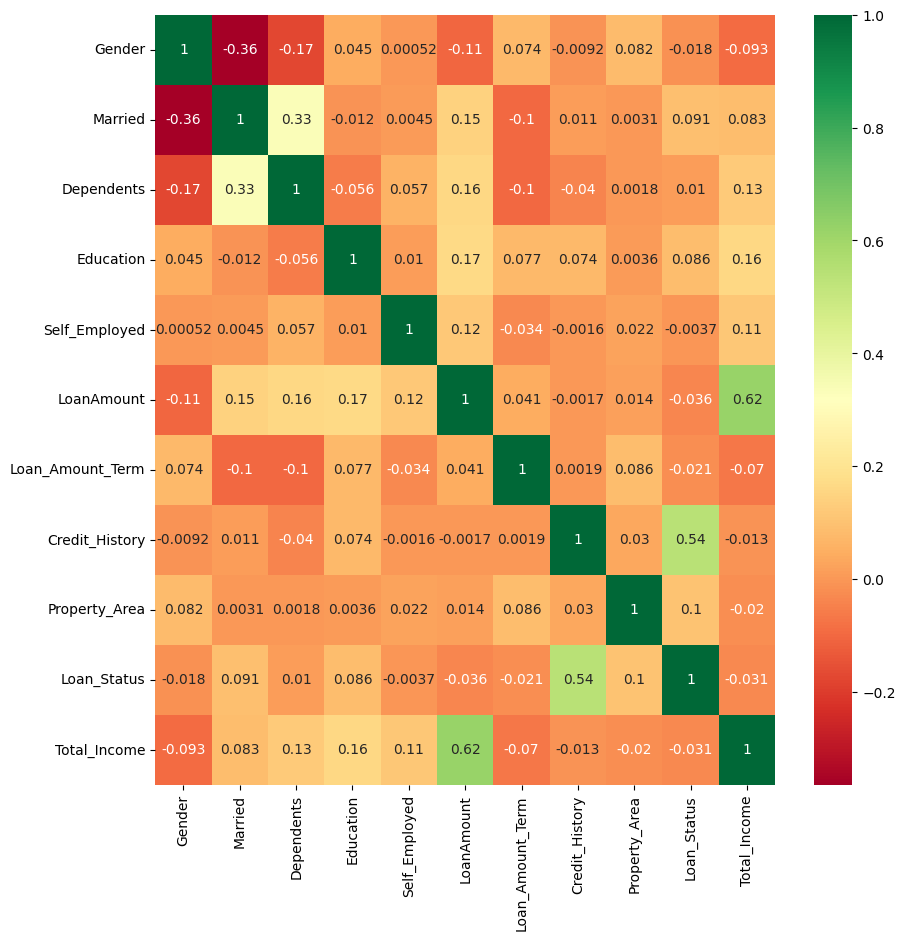

In [37]:
plt.show()

### Building Machine Learning Model

In [38]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.

x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']

In [39]:
# Using train test split on the training data for validation

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

### Decison Tree 

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
from sklearn import metrics

dtree_pred = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,dtree_pred)))

Accuracy Score = 0.7081081081081081


In [42]:
# Classification report and confusion matrix of the decision tree model

print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test,dtree_pred))

[[ 26  19]
 [ 35 105]]
              precision    recall  f1-score   support

           0       0.43      0.58      0.49        45
           1       0.85      0.75      0.80       140

    accuracy                           0.71       185
   macro avg       0.64      0.66      0.64       185
weighted avg       0.74      0.71      0.72       185



### Random Forest

In [44]:
# Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, rfc_pred)))

Accuracy_Score = 0.8054054054054054


In [45]:
# Classification report and confusion matrix of the Random Forest model
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 26  19]
 [ 17 123]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        45
           1       0.87      0.88      0.87       140

    accuracy                           0.81       185
   macro avg       0.74      0.73      0.73       185
weighted avg       0.80      0.81      0.80       185



### Logistic Regression

In [46]:
#Building the model using LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
logreg.predict(X_test)

logreg_pred = logreg.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, logreg_pred)))

Accuracy_Score = 0.8432432432432433


In [48]:
# Classification report and confusion matrix of the SVM
print(confusion_matrix(y_test,logreg_pred ))
print(classification_report(y_test,logreg_pred))

[[ 21  24]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.81      0.47      0.59        45
           1       0.85      0.96      0.90       140

    accuracy                           0.84       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.84      0.84      0.83       185



In [50]:
y_lg_prob = logreg.predict_proba(X_test)[:,1]
y_rfc_prob = rfc.predict_proba(X_test)[:,1]

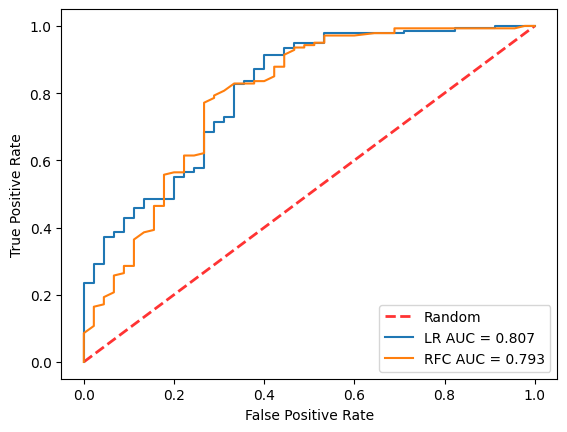

In [51]:
#For Logistic Regression
fpr, tpr, _ = metrics.roc_curve(y_test,y_lg_prob)
auc = metrics.roc_auc_score(y_test, y_lg_prob)

#For Random Forest
fpr1, tpr1, _1 = metrics.roc_curve(y_test,y_rfc_prob)
auc1 = metrics.roc_auc_score(y_test, y_rfc_prob)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr,label="LR AUC = "+str(round(auc,3)))
plt.plot(fpr1,tpr1,label="RFC AUC = "+str(round(auc1,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

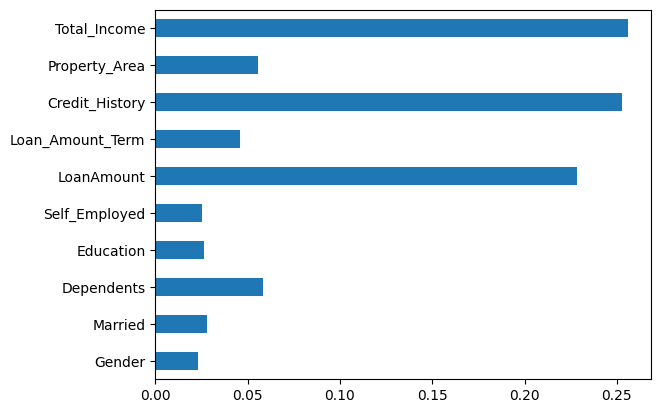

In [53]:
# Getting feature importances for Random Forest model
(pd.Series(rfc.feature_importances_, index=X_train.columns).plot(kind='barh'))
plt.show()